In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

In [4]:
b1 = bagreader('/home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-34-22.bag')
b2 = bagreader('/home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-35-39.bag')
b3 = bagreader('/home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-37-04.bag')

b = [b1, b2, b3]

[INFO]  Data folder /home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-34-22 already exists. Not creating.
[INFO]  Data folder /home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-35-39 already exists. Not creating.
[INFO]  Data folder /home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-37-04 already exists. Not creating.


In [3]:
b1.topic_table # to see all of the topics in the bag file
# We want to create a plot for error in end effector position so we are only interested in:
    # /goal_position
    # /current_position

,Topics,Types,Message Count,Frequency
0,/current_position,geometry_msgs/Point,3596,198.782180
1,/diagnostics,diagnostic_msgs/DiagnosticArray,42,0.998691
2,/goal_position,geometry_msgs/Point,9733,200.071742
3,/joy,sensor_msgs/Joy,771,243.996742
4,/robo_0/joint_0/angle_state,sensor_msgs/JointState,24335,503.034781
5,/robo_0/joint_0/joint_cmd,sensor_msgs/JointState,542,24.007235
6,/robo_0/joint_0/pressure_command,rad_msgs/PressureStamped,4888,100.023943
7,/robo_0/joint_0/pressure_state,rad_msgs/PressureStamped,18669,361.702656
8,/robo_0/joint_1/angle_state,sensor_msgs/JointState,24335,503.336613
9,/robo_0/joint_1/joint_cmd,sensor_msgs/JointState,542,24.078902


In [5]:
GOAL_MSG = []
CURRENT_MSG = []

# Get the goal positions and the current positions for each bag file
for bag in b:
    GOAL_MSG.append(bag.message_by_topic("/goal_position"))
    CURRENT_MSG.append(bag.message_by_topic("/current_position"))


'/home/daniel/research/catkin_ws/src/bellows_ik/rosbag_info/2022-12-06-10-34-22/goal_position.csv'

In [83]:
def plot_df(df):
    fig, ax = bagpy.create_fig(1)
    ax[0].scatter(x='Time', y='x', data=df)
    ax[0].scatter(x='Time', y='y', data=df)
    ax[0].scatter(x='Time', y='z', data=df)
    plt.show()

In [14]:
goal_df = []
current_df= []
# Convert messages into data frames in pandas
for i in range(len(b)):
    goal_df.append(pd.read_csv(GOAL_MSG[i]))
    current_df.append(pd.read_csv(CURRENT_MSG[i]))


In [19]:
goal_df = goal_df[0]
current_df = current_df[0]

In [60]:
# Get the time to start at 15 s for both data_frames
goal_df['Time'] = goal_df['Time'].subtract(goal_df['Time'].iat[0] + 15)

current_df['Time'] = current_df['Time'].subtract(current_df['Time'].iat[0] + 15)

In [92]:
# make goal and current df the same size
smaller_current_df = current_df[3001:]
smaller_current_df


smaller_goal_df = goal_df[3029:]
smaller_goal_df = smaller_goal_df[::11]
smaller_goal_df = smaller_goal_df[:-15]
smaller_goal_df

,Time,x,y,z
3029,0.004057,0.122937,0.636969,0.637813
3040,0.058970,0.122937,0.636969,0.637813
3051,0.113986,0.122937,0.636969,0.637813
3062,0.168936,0.122937,0.636969,0.637813
3073,0.223957,0.122937,0.636969,0.637813
...,...,...,...,...
9519,32.453881,0.537787,-0.423449,0.356810
9530,32.508924,0.537787,-0.423449,0.356810
9541,32.563938,0.537787,-0.423449,0.356810
9552,32.618870,0.537787,-0.423449,0.356810


In [93]:
# Get the error for each direction into one data_frame
error_df =pd.DataFrame()
# for i in range(len(b)):
error_df['x'] = smaller_goal_df['x'] - smaller_current_df['x']
error_df['y'] = smaller_goal_df['y'] - smaller_current_df['y']
error_df['z'] = smaller_goal_df['z'] - smaller_current_df['z']

In [94]:
smaller_current_df['x']

3001    0.117215
3002    0.117229
3003    0.117237
3004    0.117260
3005    0.117253
          ...   
3591    0.576675
3592    0.580387
3593    0.584241
3594    0.576255
3595    0.566797
Name: x, Length: 595, dtype: float64

In [95]:
smaller_goal_df['x']

3029    0.122937
3040    0.122937
3051    0.122937
3062    0.122937
3073    0.122937
          ...   
9519    0.537787
9530    0.537787
9541    0.537787
9552    0.537787
9563    0.537787
Name: x, Length: 595, dtype: float64

In [10]:
goal_df[0].columns

Index(['Time', 'x', 'y', 'z'], dtype='object')

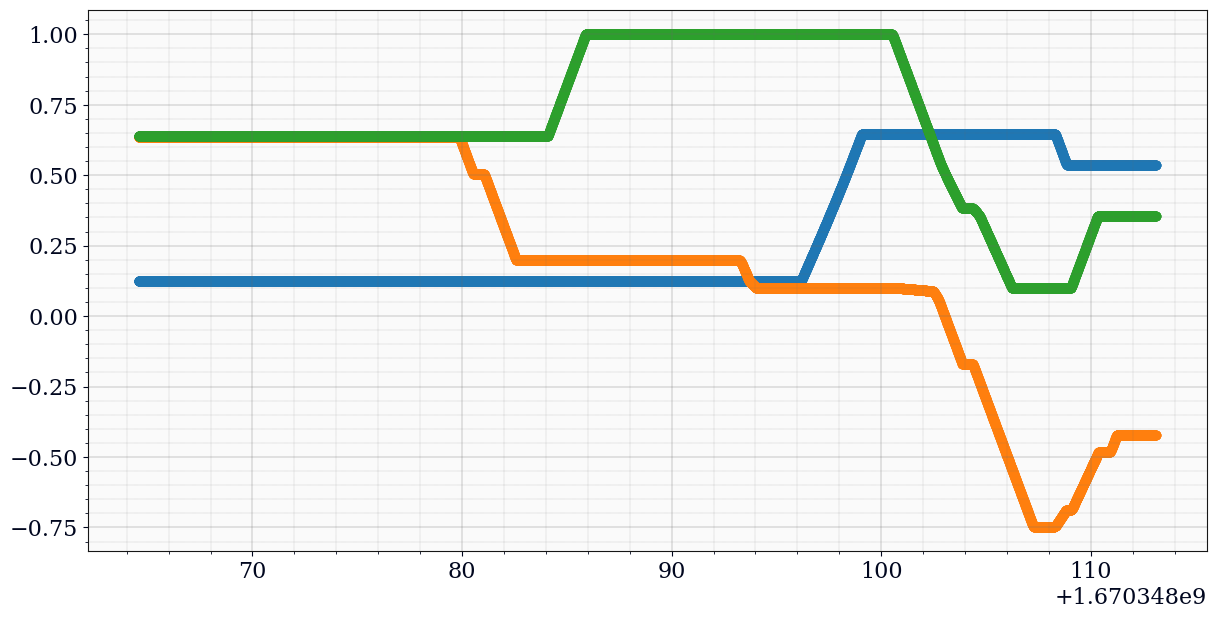

In [12]:


plt.show()